<center><h1>Crime Rate Prediction with Regularized Regression and Boosting</h1></center>
<center>Taroon Ganesh - taroon23</center>
<br>
<br>

## 1. Decision Trees as Interpretable Models

Import packages

In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
import warnings
warnings.simplefilter('ignore')

### (a) Obtain Data

Get the Accute Inamations Data Set

In [2]:
datapath_1 = '../data/diagnosis.data'
datapath_2 = '../data/communities.data'

In [3]:
data = pd.read_csv(datapath_1, encoding='utf-16',decimal=',', sep='\s+')
data

35,5   no  yes no.1 no.2 no.3 no.4 no.5
0    35.9   no   no  yes  yes  yes  yes   no
1    35.9   no  yes   no   no   no   no   no
2    36.0   no   no  yes  yes  yes  yes   no
3    36.0   no  yes   no   no   no   no   no
4    36.0   no  yes   no   no   no   no   no
..    ...  ...  ...  ...  ...  ...  ...  ...
114  41.4   no  yes  yes   no  yes   no  yes
115  41.5   no   no   no   no   no   no   no
116  41.5  yes  yes   no  yes   no   no  yes
117  41.5   no  yes  yes   no  yes   no  yes
118  41.5   no  yes  yes   no  yes   no  yes

[119 rows x 8 columns]

In [32]:
name_file_path = '../data/diagnosis.names'
with open(name_file_path, 'r') as file:
    name_file_contents = file.read()

print(name_file_contents)

Title: Acute Inflammations

Abstract: The data was created by a medical expert as a data set to test 
the expert system, which will perform the presumptive diagnosis of two 
diseases of the urinary system.
	
----------------------------------------------------------------------------

Data Set Characteristics:  Multivariate
Attribute Characteristics: Categorical, Integer
Associated Tasks: Classification
Number of Instances: 120
Number of Attributes: 6
Missing Values? No
Area: Life
Date Donated: 2009-02-11

----------------------------------------------------------------------------

Source:

Jacek Czerniak, Ph.D., Assistant Professor
Systems Research Institute
Polish Academy of Sciences
Laboratory of Intelligent Systems
ul. Newelska 6, Room 218
01-447 Warszawa, Poland
e-mail: jacek.czerniak 'at' ibspan.waw.pl or jczerniak 'at' ukw.edu.pl 

----------------------------------------------------------------------------


Data Set Information:

The main idea of this data set is to prepare t

In [4]:
data.columns = ["a1", "a2", "a3", "a4", "a5", "a6", "d1", "d2"]
for col in data.columns:
    data.loc[data[col] == 'no', col] = 0
    data.loc[data[col] == 'yes', col] = 1
data

a1 a2 a3 a4 a5 a6 d1 d2
0    35.9  0  0  1  1  1  1  0
1    35.9  0  1  0  0  0  0  0
2    36.0  0  0  1  1  1  1  0
3    36.0  0  1  0  0  0  0  0
4    36.0  0  1  0  0  0  0  0
..    ... .. .. .. .. .. .. ..
114  41.4  0  1  1  0  1  0  1
115  41.5  0  0  0  0  0  0  0
116  41.5  1  1  0  1  0  0  1
117  41.5  0  1  1  0  1  0  1
118  41.5  0  1  1  0  1  0  1

[119 rows x 8 columns]

### (b) Build a decision tree

##### Build a decision tree on the whole data set and plot it

In [5]:
def decision_tree(X,y):
    model = DecisionTreeClassifier()
    model.fit(X, y)

    print("Text Representation:\n")
    print(tree.export_text(model))

    print("Decision Tree:\n")
    tree.plot_tree(model, filled = True)

Text Representation:

|--- feature_3 <= 0.50
|   |--- class: 0
|--- feature_3 >  0.50
|   |--- feature_4 <= 0.50
|   |   |--- feature_0 <= 37.95
|   |   |   |--- class: 1
|   |   |--- feature_0 >  37.95
|   |   |   |--- class: 0
|   |--- feature_4 >  0.50
|   |   |--- class: 1

Decision Tree:



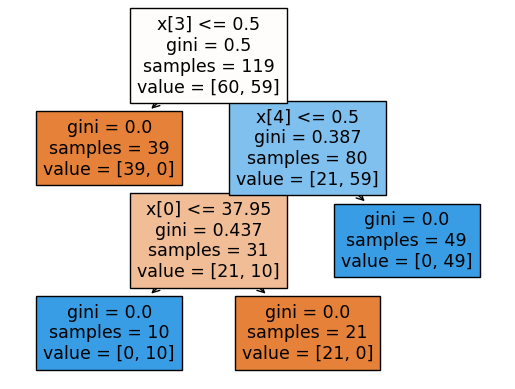

In [6]:
X = data.drop(columns=['d1', 'd2'])
y = data[['d1']].astype('int')

decision_tree(X,y)

Text Representation:

|--- feature_0 <= 37.95
|   |--- class: 0
|--- feature_0 >  37.95
|   |--- feature_2 <= 0.50
|   |   |--- class: 0
|   |--- feature_2 >  0.50
|   |   |--- class: 1

Decision Tree:



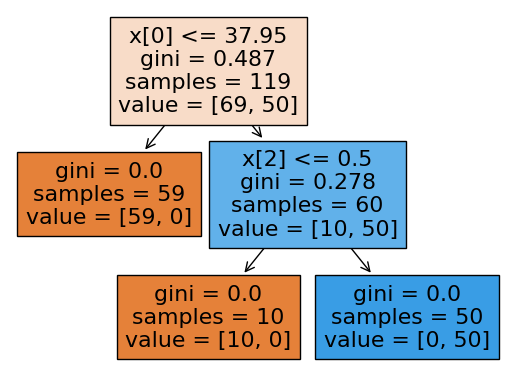

In [8]:
X = data.drop(columns=['d1', 'd2'])
y = data[['d2']].astype('int')

decision_tree(X,y)

Text Representation:

|--- feature_0 <= 37.95
|   |--- feature_2 <= 0.50
|   |   |--- class: 1
|   |--- feature_2 >  0.50
|   |   |--- class: 0
|--- feature_0 >  37.95
|   |--- feature_2 <= 0.50
|   |   |--- class: 0
|   |--- feature_2 >  0.50
|   |   |--- feature_4 <= 0.50
|   |   |   |--- class: 0
|   |   |--- feature_4 >  0.50
|   |   |   |--- feature_3 <= 0.50
|   |   |   |   |--- class: 0
|   |   |   |--- feature_3 >  0.50
|   |   |   |   |--- class: 0

Decision Tree:



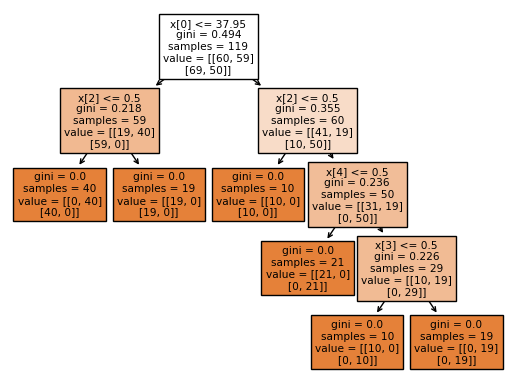

In [7]:
X = data.drop(columns=['d1', 'd2'])
y = data[['d1', 'd2']].astype('int')

decision_tree(X,y)

### (c) Convert the decision rules

##### Convert the decision rules into a set of IF-THEN rules.

In [8]:
def decision_tree(X,y):
    model = DecisionTreeClassifier()
    model.fit(X, y)
    return model

def tree_to_pseudo(tree, feature_names):

    left = tree.tree_.children_left
    right = tree.tree_.children_right
    threshold = tree.tree_.threshold
    features = [feature_names[i] for i in tree.tree_.feature]
    value = tree.tree_.value
    
    def recurse(left, right, threshold, features, node, depth=0):
        indent = "  " * depth
        if (threshold[node] != -2):
            print(indent, "if " + features[node] + " <= " + str(threshold[node]) + ":")
            if left[node] != -1:
                recurse(left, right, threshold, features, left[node], depth+1)
            else:
                print(indent + "  ", end="")
                print("return [ " + " ".join([str(x) for x in value[node][0]]) + " ]", end="")
                print("[ " + " ".join([str(x) for x in value[node][1]]) + " ]")
            print(indent, "else:")
            if right[node] != -1:
                recurse(left, right, threshold, features, right[node], depth+1)
            else:
                print(indent + "  ", end="")
                print("return [ " + " ".join([str(x) for x in value[node][0]]) + " ]", end="")
                print("[ " + " ".join([str(x) for x in value[node][1]]) + " ]")
        else:
            print(indent, "return " + str(value[node]))

    recurse(left, right, threshold, features, 0)

In [9]:
X = data.drop(columns=['d1', 'd2'])
y = data[['d1', 'd2']].astype('int')

decisiontree = decision_tree(X,y)

feature_names = ['Temperature', 'Nausea', 'Lumbar pain', 'Urine pushing', 'Micturition pains', 'Burning of urethra']
tree_to_pseudo(decisiontree, feature_names)

 if Temperature <= 37.95000076293945:
   if Urine pushing <= 0.5:
     return [[19.  0.]
 [19.  0.]]
   else:
     return [[ 0. 40.]
 [40.  0.]]
 else:
   if Lumbar pain <= 0.5:
     return [[10.  0.]
 [10.  0.]]
   else:
     if Micturition pains <= 0.5:
       return [[21.  0.]
 [ 0. 21.]]
     else:
       if Urine pushing <= 0.5:
         return [[10.  0.]
 [ 0. 10.]]
       else:
         return [[ 0. 19.]
 [ 0. 19.]]


### (d) Cost-complexity pruning

##### Use cost-complexity pruning to find a minimal decision tree and a set of decision rules with high interpretability

In [10]:
X = data.drop(columns=['d1', 'd2'])
y = data[['d1', 'd2']].astype('int')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Create a sequence of decision trees with increasing complexity using cost-complexity pruning
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas[:-1], path.impurities[:-1]

# Train a series of decision trees with different complexity levels
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

# Evaluate each tree in the sequence
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

# Find the optimal tree with the highest accuracy on the test set
optimal_clf = clfs[test_scores.index(max(test_scores))]

In [11]:
optimal_index = test_scores.index(max(test_scores))

# Retrieve the corresponding optimal alpha value
optimal_alpha = ccp_alphas[optimal_index]

print("Optimal alpha value:", optimal_alpha)

Optimal alpha value: 0.0


[Text(0.4, 0.9, 'x[0] <= 37.95\ngini = 0.494\nsamples = 95\nvalue = [[44, 51]\n[54, 41]]'),
 Text(0.2, 0.7, 'x[3] <= 0.5\ngini = 0.19\nsamples = 47\nvalue = [[12, 35]\n[47, 0]]'),
 Text(0.1, 0.5, 'gini = 0.0\nsamples = 12\nvalue = [[12, 0]\n[12, 0]]'),
 Text(0.3, 0.5, 'gini = 0.0\nsamples = 35\nvalue = [[0, 35]\n[35, 0]]'),
 Text(0.6, 0.7, 'x[2] <= 0.5\ngini = 0.347\nsamples = 48\nvalue = [[32, 16]\n[7, 41]]'),
 Text(0.5, 0.5, 'gini = 0.0\nsamples = 7\nvalue = [[7, 0]\n[7, 0]]'),
 Text(0.7, 0.5, 'x[1] <= 0.5\ngini = 0.238\nsamples = 41\nvalue = [[25, 16]\n[0, 41]]'),
 Text(0.6, 0.3, 'gini = 0.0\nsamples = 16\nvalue = [[16, 0]\n[0, 16]]'),
 Text(0.8, 0.3, 'x[3] <= 0.5\ngini = 0.23\nsamples = 25\nvalue = [[9, 16]\n[0, 25]]'),
 Text(0.7, 0.1, 'gini = 0.0\nsamples = 9\nvalue = [[9, 0]\n[0, 9]]'),
 Text(0.9, 0.1, 'gini = 0.0\nsamples = 16\nvalue = [[0, 16]\n[0, 16]]')]

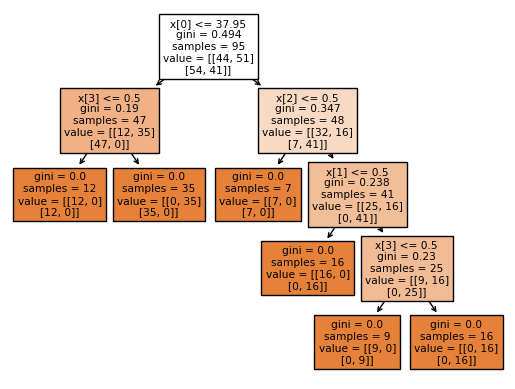

In [12]:
optimal_clf

tree.plot_tree(optimal_clf, filled = True)

In [13]:
tree_to_pseudo(optimal_clf, feature_names)

 if Temperature <= 37.95000076293945:
   if Urine pushing <= 0.5:
     return [[12.  0.]
 [12.  0.]]
   else:
     return [[ 0. 35.]
 [35.  0.]]
 else:
   if Lumbar pain <= 0.5:
     return [[7. 0.]
 [7. 0.]]
   else:
     if Nausea <= 0.5:
       return [[16.  0.]
 [ 0. 16.]]
     else:
       if Urine pushing <= 0.5:
         return [[9. 0.]
 [0. 9.]]
       else:
         return [[ 0. 16.]
 [ 0. 16.]]


## 2. The LASSO and Boosting for Regression

### (a) Obtain Data

In [14]:
data = pd.read_csv(datapath_2, na_values = '?', header = None)#, encoding='utf-16',decimal=',', sep='\s+')
data

0     1        2                    3    4     5     6     7     8    \
0       8   NaN      NaN         Lakewoodcity    1  0.19  0.33  0.02  0.90   
1      53   NaN      NaN          Tukwilacity    1  0.00  0.16  0.12  0.74   
2      24   NaN      NaN         Aberdeentown    1  0.00  0.42  0.49  0.56   
3      34   5.0  81440.0  Willingborotownship    1  0.04  0.77  1.00  0.08   
4      42  95.0   6096.0    Bethlehemtownship    1  0.01  0.55  0.02  0.95   
...   ...   ...      ...                  ...  ...   ...   ...   ...   ...   
1989   12   NaN      NaN    TempleTerracecity   10  0.01  0.40  0.10  0.87   
1990    6   NaN      NaN          Seasidecity   10  0.05  0.96  0.46  0.28   
1991    9   9.0  80070.0        Waterburytown   10  0.16  0.37  0.25  0.69   
1992   25  17.0  72600.0          Walthamcity   10  0.08  0.51  0.06  0.87   
1993    6   NaN      NaN          Ontariocity   10  0.20  0.78  0.14  0.46   

       9    ...   118   119   120   121   122   123  124   125   126   127  
0     0.12  ...  0.12  0.26  0.20  0.06  0.04  0.90  0.5  0.32  0.14  0.20  
1     0.45  ...  0.02  0.12  0.45   NaN   NaN   NaN  NaN  0.00   NaN  0.67  
2     0.17  ...  0.01  0.21  0.02   NaN   NaN   NaN  NaN  0.00   NaN  0.43  
3     0.12  ...  0.02  0.39  0.28   NaN   NaN   NaN  NaN  0.00   NaN  0.12  
4     0.09  ...  0.04  0.09  0.02   NaN   NaN   NaN  NaN  0.00   NaN  0.03  
...    ...  ...   ...   ...   ...   ...   ...   ...  ...   ...   ...   ...  
1989  0.12  ...  0.01  0.28  0.05   NaN   NaN   NaN  NaN  0.00   NaN  0.09  
1990  0.83  ...  0.02  0.37  0.20   NaN   NaN   NaN  NaN  0.00   NaN  0.45  
1991  0.04  ...  0.08  0.32  0.18  0.08  0.06  0.78  0.0  0.91  0.28  0.23  
1992  0.22  ...  0.03  0.38  0.33  0.02  0.02  0.79  0.0  0.22  0.18  0.19  
1993  0.24  ...  0.11  0.30  0.05  0.08  0.04  0.73  0.5  1.00  0.13  0.48  

[1994 rows x 128 columns]

In [15]:
# Open the .name file
name_file_path = '../data/communities.names'
with open(name_file_path, 'r') as file:
    column_names = []
    for line in file:
        if '@attribute' in line:
            line = line.split(" ")
            column_names.append(line[1])

print(column_names)

['state', 'county', 'community', 'communityname', 'fold', 'population', 'householdsize', 'racepctblack', 'racePctWhite', 'racePctAsian', 'racePctHisp', 'agePct12t21', 'agePct12t29', 'agePct16t24', 'agePct65up', 'numbUrban', 'pctUrban', 'medIncome', 'pctWWage', 'pctWFarmSelf', 'pctWInvInc', 'pctWSocSec', 'pctWPubAsst', 'pctWRetire', 'medFamInc', 'perCapInc', 'whitePerCap', 'blackPerCap', 'indianPerCap', 'AsianPerCap', 'OtherPerCap', 'HispPerCap', 'NumUnderPov', 'PctPopUnderPov', 'PctLess9thGrade', 'PctNotHSGrad', 'PctBSorMore', 'PctUnemployed', 'PctEmploy', 'PctEmplManu', 'PctEmplProfServ', 'PctOccupManu', 'PctOccupMgmtProf', 'MalePctDivorce', 'MalePctNevMarr', 'FemalePctDiv', 'TotalPctDiv', 'PersPerFam', 'PctFam2Par', 'PctKids2Par', 'PctYoungKids2Par', 'PctTeen2Par', 'PctWorkMomYoungKids', 'PctWorkMom', 'NumIlleg', 'PctIlleg', 'NumImmig', 'PctImmigRecent', 'PctImmigRec5', 'PctImmigRec8', 'PctImmigRec10', 'PctRecentImmig', 'PctRecImmig5', 'PctRecImmig8', 'PctRecImmig10', 'PctSpeakEnglOn

In [16]:
data.columns = column_names
data

state  county  community        communityname  fold  population  \
0         8     NaN        NaN         Lakewoodcity     1        0.19   
1        53     NaN        NaN          Tukwilacity     1        0.00   
2        24     NaN        NaN         Aberdeentown     1        0.00   
3        34     5.0    81440.0  Willingborotownship     1        0.04   
4        42    95.0     6096.0    Bethlehemtownship     1        0.01   
...     ...     ...        ...                  ...   ...         ...   
1989     12     NaN        NaN    TempleTerracecity    10        0.01   
1990      6     NaN        NaN          Seasidecity    10        0.05   
1991      9     9.0    80070.0        Waterburytown    10        0.16   
1992     25    17.0    72600.0          Walthamcity    10        0.08   
1993      6     NaN        NaN          Ontariocity    10        0.20   

      householdsize  racepctblack  racePctWhite  racePctAsian  ...  LandArea  \
0              0.33          0.02          0.90          0.12  ...      0.12   
1              0.16          0.12          0.74          0.45  ...      0.02   
2              0.42          0.49          0.56          0.17  ...      0.01   
3              0.77          1.00          0.08          0.12  ...      0.02   
4              0.55          0.02          0.95          0.09  ...      0.04   
...             ...           ...           ...           ...  ...       ...   
1989           0.40          0.10          0.87          0.12  ...      0.01   
1990           0.96          0.46          0.28          0.83  ...      0.02   
1991           0.37          0.25          0.69          0.04  ...      0.08   
1992           0.51          0.06          0.87          0.22  ...      0.03   
1993           0.78          0.14          0.46          0.24  ...      0.11   

      PopDens  PctUsePubTrans  PolicCars  PolicOperBudg  LemasPctPolicOnPatr  \
0        0.26            0.20       0.06           0.04                 0.90   
1        0.12            0.45        NaN            NaN                  NaN   
2        0.21            0.02        NaN            NaN                  NaN   
3        0.39            0.28        NaN            NaN                  NaN   
4        0.09            0.02        NaN            NaN                  NaN   
...       ...             ...        ...            ...                  ...   
1989     0.28            0.05        NaN            NaN                  NaN   
1990     0.37            0.20        NaN            NaN                  NaN   
1991     0.32            0.18       0.08           0.06                 0.78   
1992     0.38            0.33       0.02           0.02                 0.79   
1993     0.30            0.05       0.08           0.04                 0.73   

      LemasGangUnitDeploy  LemasPctOfficDrugUn  PolicBudgPerPop  \
0                     0.5                 0.32             0.14   
1                     NaN                 0.00              NaN   
2                     NaN                 0.00              NaN   
3                     NaN                 0.00              NaN   
4                     NaN                 0.00              NaN   
...                   ...                  ...              ...   
1989                  NaN                 0.00              NaN   
1990                  NaN                 0.00              NaN   
1991                  0.0                 0.91             0.28   
1992                  0.0                 0.22             0.18   
1993                  0.5                 1.00             0.13   

      ViolentCrimesPerPop  
0                    0.20  
1                    0.67  
2                    0.43  
3                    0.12  
4                    0.03  
...                   ...  
1989                 0.09  
1990                 0.45  
1991                 0.23  
1992                 0.19  
1993                 0.48  

[1994 rows x 128 columns]

##### Use the first 1495 rows of data as the training set and the rest as the test set.

In [17]:
train_data = data[:1495]
test_data = data[1495:]

train_data

state  county  community        communityname  fold  population  \
0         8     NaN        NaN         Lakewoodcity     1        0.19   
1        53     NaN        NaN          Tukwilacity     1        0.00   
2        24     NaN        NaN         Aberdeentown     1        0.00   
3        34     5.0    81440.0  Willingborotownship     1        0.04   
4        42    95.0     6096.0    Bethlehemtownship     1        0.01   
...     ...     ...        ...                  ...   ...         ...   
1490      6     NaN        NaN     Hillsboroughtown     8        0.00   
1491      6     NaN        NaN           Orangecity     8        0.16   
1492     13     NaN        NaN         Waycrosscity     8        0.01   
1493     39    85.0    49056.0           Mentorcity     8        0.06   
1494     34    17.0    79610.0      WestNewYorktown     8        0.05   

      householdsize  racepctblack  racePctWhite  racePctAsian  ...  LandArea  \
0              0.33          0.02          0.90          0.12  ...      0.12   
1              0.16          0.12          0.74          0.45  ...      0.02   
2              0.42          0.49          0.56          0.17  ...      0.01   
3              0.77          1.00          0.08          0.12  ...      0.02   
4              0.55          0.02          0.95          0.09  ...      0.04   
...             ...           ...           ...           ...  ...       ...   
1490           0.59          0.01          0.69          1.00  ...      0.02   
1491           0.62          0.03          0.74          0.48  ...      0.07   
1492           0.36          0.95          0.24          0.03  ...      0.03   
1493           0.53          0.01          0.98          0.05  ...      0.08   
1494           0.43          0.08          0.65          0.12  ...      0.00   

      PopDens  PctUsePubTrans  PolicCars  PolicOperBudg  LemasPctPolicOnPatr  \
0        0.26            0.20       0.06           0.04                 0.90   
1        0.12            0.45        NaN            NaN                  NaN   
2        0.21            0.02        NaN            NaN                  NaN   
3        0.39            0.28        NaN            NaN                  NaN   
4        0.09            0.02        NaN            NaN                  NaN   
...       ...             ...        ...            ...                  ...   
1490     0.14            0.22        NaN            NaN                  NaN   
1491     0.40            0.14       0.07           0.05                 0.85   
1492     0.12            0.01        NaN            NaN                  NaN   
1493     0.15            0.02        NaN            NaN                  NaN   
1494     1.00            1.00       0.00           0.01                 0.77   

      LemasGangUnitDeploy  LemasPctOfficDrugUn  PolicBudgPerPop  \
0                     0.5                 0.32             0.14   
1                     NaN                 0.00              NaN   
2                     NaN                 0.00              NaN   
3                     NaN                 0.00              NaN   
4                     NaN                 0.00              NaN   
...                   ...                  ...              ...   
1490                  NaN                 0.00              NaN   
1491                  0.5                 0.61             0.19   
1492                  NaN                 0.00              NaN   
1493                  NaN                 0.00              NaN   
1494                  0.0                 0.51             0.18   

      ViolentCrimesPerPop  
0                    0.20  
1                    0.67  
2                    0.43  
3                    0.12  
4                    0.03  
...                   ...  
1490                 0.03  
1491                 0.20  
1492                 0.30  
1493                 0.03  
1494                 0.23  

[1495 rows x 128 columns]

In [18]:
test_data

state  county  community      communityname  fold  population  \
1495      6     NaN        NaN     MillValleycity     8        0.00   
1496     48     NaN        NaN        LiveOakcity     8        0.00   
1497     35     NaN        NaN       Portalescity     8        0.00   
1498     42    17.0    25112.0      Fallstownship     8        0.04   
1499     51   683.0    48952.0       Manassascity     8        0.03   
...     ...     ...        ...                ...   ...         ...   
1989     12     NaN        NaN  TempleTerracecity    10        0.01   
1990      6     NaN        NaN        Seasidecity    10        0.05   
1991      9     9.0    80070.0      Waterburytown    10        0.16   
1992     25    17.0    72600.0        Walthamcity    10        0.08   
1993      6     NaN        NaN        Ontariocity    10        0.20   

      householdsize  racepctblack  racePctWhite  racePctAsian  ...  LandArea  \
1495           0.20          0.03          0.91          0.23  ...      0.01   
1496           0.55          0.13          0.78          0.15  ...      0.01   
1497           0.52          0.04          0.59          0.05  ...      0.01   
1498           0.51          0.07          0.92          0.09  ...      0.06   
1499           0.59          0.20          0.75          0.19  ...      0.03   
...             ...           ...           ...           ...  ...       ...   
1989           0.40          0.10          0.87          0.12  ...      0.01   
1990           0.96          0.46          0.28          0.83  ...      0.02   
1991           0.37          0.25          0.69          0.04  ...      0.08   
1992           0.51          0.06          0.87          0.22  ...      0.03   
1993           0.78          0.14          0.46          0.24  ...      0.11   

      PopDens  PctUsePubTrans  PolicCars  PolicOperBudg  LemasPctPolicOnPatr  \
1495     0.23            0.73        NaN            NaN                  NaN   
1496     0.18            0.02        NaN            NaN                  NaN   
1497     0.18            0.00        NaN            NaN                  NaN   
1498     0.13            0.16        NaN            NaN                  NaN   
1499     0.23            0.06        NaN            NaN                  NaN   
...       ...             ...        ...            ...                  ...   
1989     0.28            0.05        NaN            NaN                  NaN   
1990     0.37            0.20        NaN            NaN                  NaN   
1991     0.32            0.18       0.08           0.06                 0.78   
1992     0.38            0.33       0.02           0.02                 0.79   
1993     0.30            0.05       0.08           0.04                 0.73   

      LemasGangUnitDeploy  LemasPctOfficDrugUn  PolicBudgPerPop  \
1495                  NaN                 0.00              NaN   
1496                  NaN                 0.00              NaN   
1497                  NaN                 0.00              NaN   
1498                  NaN                 0.00              NaN   
1499                  NaN                 0.00              NaN   
...                   ...                  ...              ...   
1989                  NaN                 0.00              NaN   
1990                  NaN                 0.00              NaN   
1991                  0.0                 0.91             0.28   
1992                  0.0                 0.22             0.18   
1993                  0.5                 1.00             0.13   

      ViolentCrimesPerPop  
1495                 0.12  
1496                 0.11  
1497                 0.12  
1498                 0.06  
1499                 0.12  
...                   ...  
1989                 0.09  
1990                 0.45  
1991                 0.23  
1992                 0.19  
1993                 0.48  

[499 rows x 128 columns]

### (b) Missing values

##### The data set has missing values. Use a data imputation technique to deal with the missing values in the data set. The data description mentions some features are nonpredictive. Ignore those features.

In [19]:
unwanted_features = ['state', 'county', 'community', 'communityname', 'fold']

data = data.drop(columns = unwanted_features)
train_data = train_data.drop(columns = unwanted_features)
test_data = test_data.drop(columns = unwanted_features)

In [20]:
imputer = SimpleImputer(strategy='mean')

# Perform imputation
imputed_data = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)
imputed_train_data = pd.DataFrame(imputer.fit_transform(train_data), columns=train_data.columns)
imputed_test_data = pd.DataFrame(imputer.fit_transform(test_data), columns=test_data.columns)

# Display the DataFrame after imputation
print(imputed_data)
print(imputed_train_data)
print(imputed_test_data)

      population  householdsize  racepctblack  racePctWhite  racePctAsian  \
0           0.19           0.33          0.02          0.90          0.12   
1           0.00           0.16          0.12          0.74          0.45   
2           0.00           0.42          0.49          0.56          0.17   
3           0.04           0.77          1.00          0.08          0.12   
4           0.01           0.55          0.02          0.95          0.09   
...          ...            ...           ...           ...           ...   
1989        0.01           0.40          0.10          0.87          0.12   
1990        0.05           0.96          0.46          0.28          0.83   
1991        0.16           0.37          0.25          0.69          0.04   
1992        0.08           0.51          0.06          0.87          0.22   
1993        0.20           0.78          0.14          0.46          0.24   

      racePctHisp  agePct12t21  agePct12t29  agePct16t24  agePct65up  ...  

### (c) Plot a correlation matrix

##### Plot a correlation matrix for the features in the data set

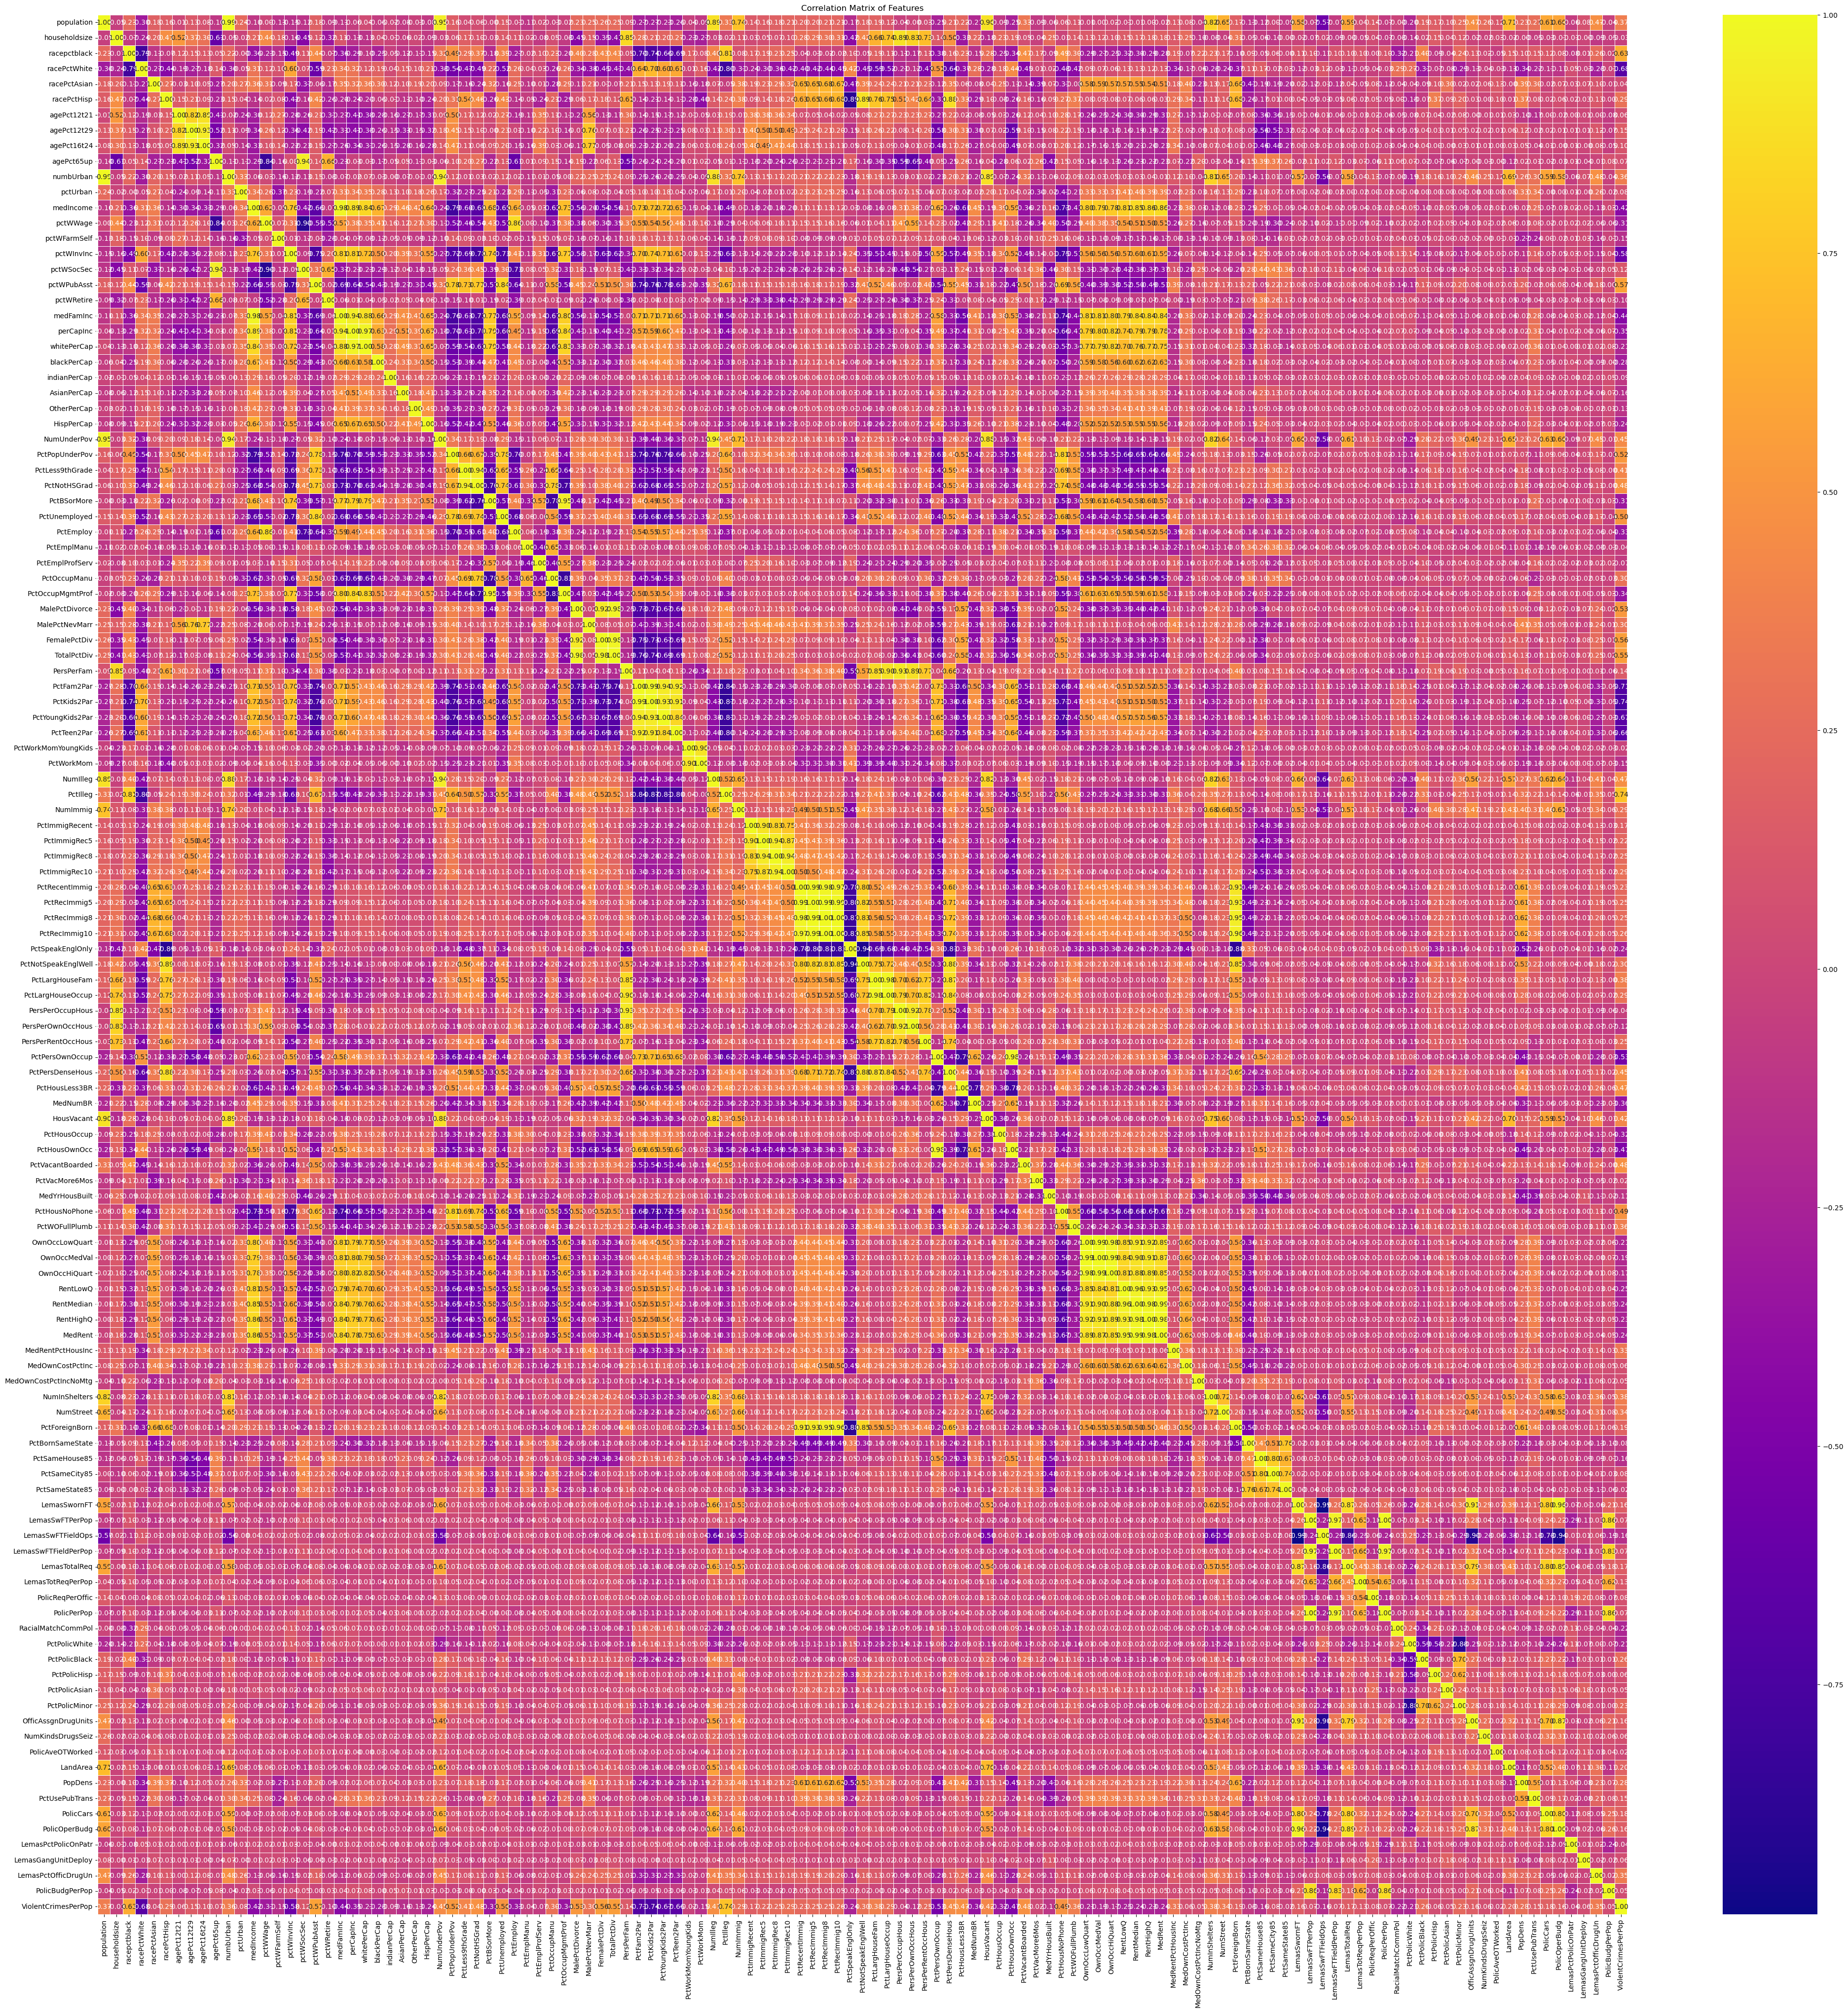

In [21]:
# Compute the correlation matrix
correlation_matrix = imputed_data.corr()

# Set up the matplotlib figure
plt.figure(figsize=(50, 50))

# Plot the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap = 'plasma', fmt=".2f", linewidths=0.5)

# Add title and display the plot
plt.title('Correlation Matrix of Features')
plt.show()

### (d) Calculate the Coefficient of Variation CV

##### Calculate the Coefficient of Variation CV for each feature, where CV = s/m, in which s is sample standard deviation and m is sample mean.

In [22]:
cv= {} 

for col in imputed_data.columns:
    mean = imputed_data[col].mean()
    std_dev = imputed_data[col].std()
    
    cv[col] = [mean, std_dev, std_dev/mean]

cv = pd.DataFrame(cv)
cv.index = ['Mean', 'Standard Deviation', 'Coefficient of Variation']

cv_result = cv.transpose()
cv_result

Mean  Standard Deviation  Coefficient of Variation
population           0.057593            0.126906                  2.203503
householdsize        0.463395            0.163717                  0.353298
racepctblack         0.179629            0.253442                  1.410920
racePctWhite         0.753716            0.244039                  0.323782
racePctAsian         0.153681            0.208877                  1.359162
...                       ...                 ...                       ...
LemasPctPolicOnPatr  0.698589            0.085459                  0.122331
LemasGangUnitDeploy  0.440439            0.162099                  0.368040
LemasPctOfficDrugUn  0.094052            0.240328                  2.555266
PolicBudgPerPop      0.195078            0.065796                  0.337281
ViolentCrimesPerPop  0.237979            0.232985                  0.979015

[123 rows x 3 columns]

### (e) Scatter plots and box plots for highest CV features

##### Pick √128 features with highest CV , and make scatter plots and box plots for them. Can you draw conclusions about significance of those features, just by the scatter plots?

NumStreet              4.407702
NumInShelters          3.485481
NumIlleg               2.994196
NumImmig               2.900497
LemasPctOfficDrugUn    2.555266
NumUnderPov            2.304970
population             2.203503
numbUrban              2.001744
HousVacant             1.958780
LandArea               1.678031
racePctHisp            1.614278
Name: Coefficient of Variation, dtype: float64


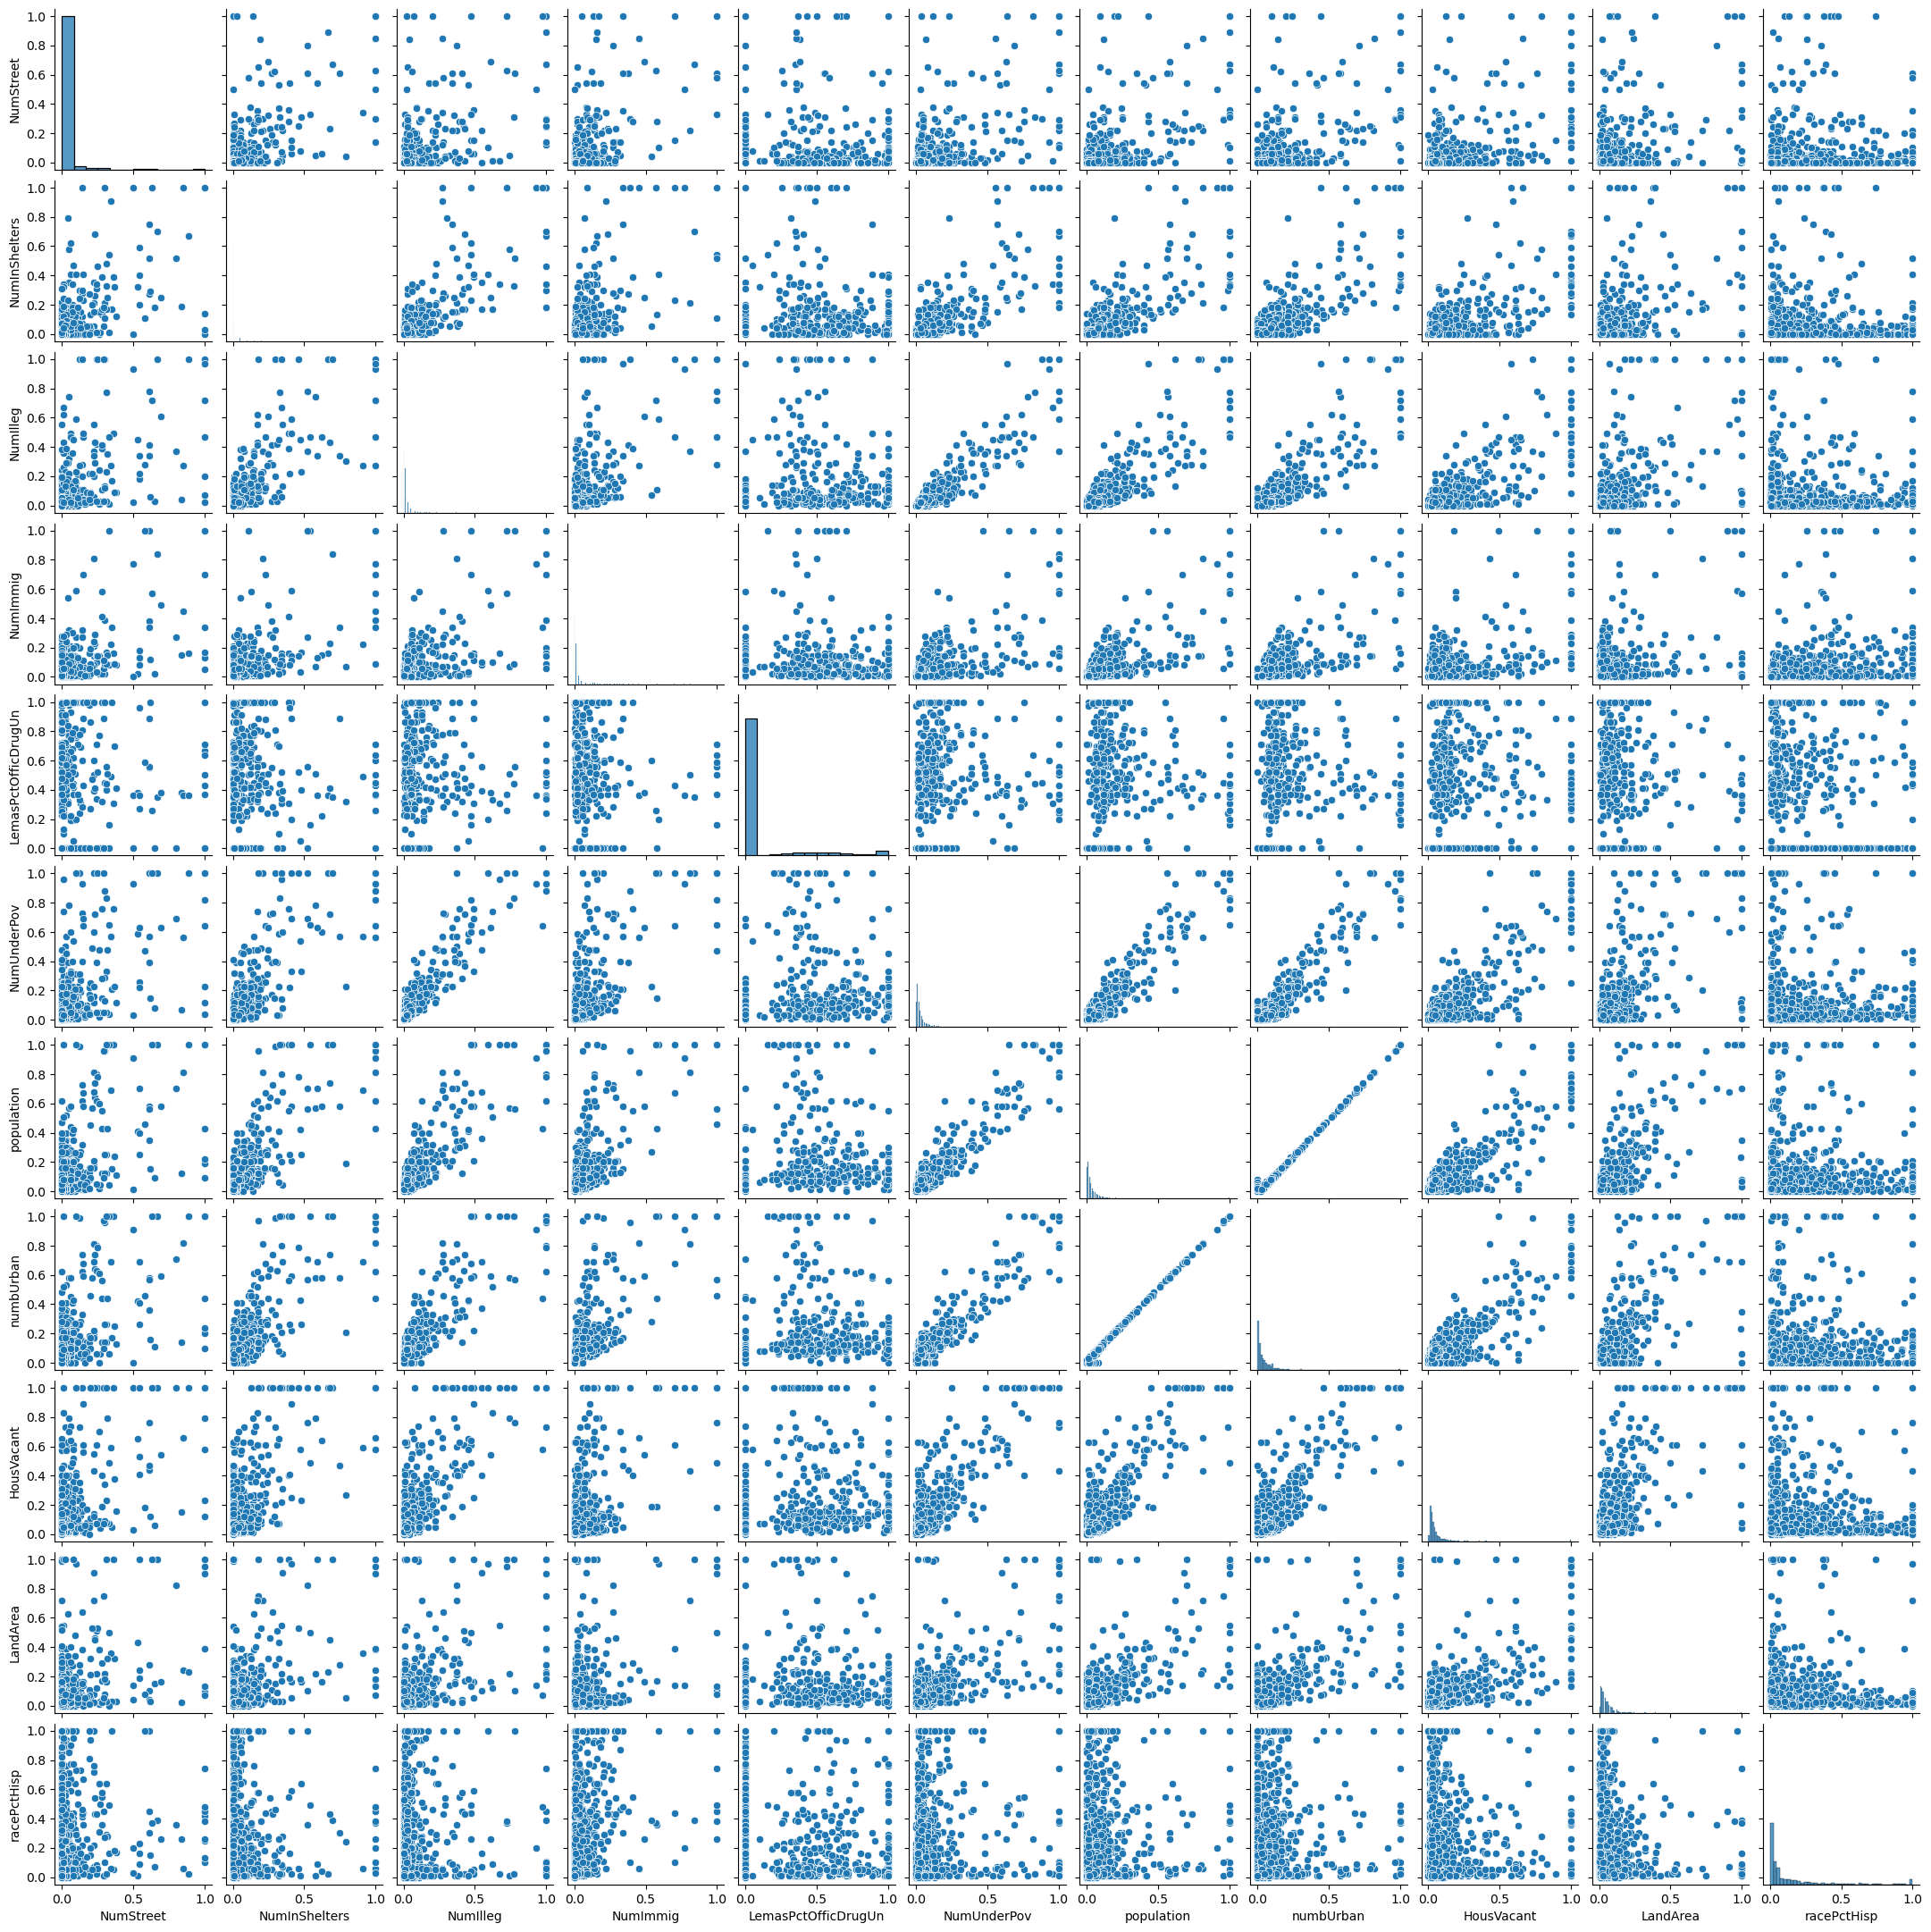

In [23]:
top_features = cv.loc['Coefficient of Variation'].sort_values(ascending=False).head(int(np.sqrt(128)))
print(top_features)

selected_features = top_features.index.tolist()

sns.pairplot(data = imputed_data[selected_features], height = 2)

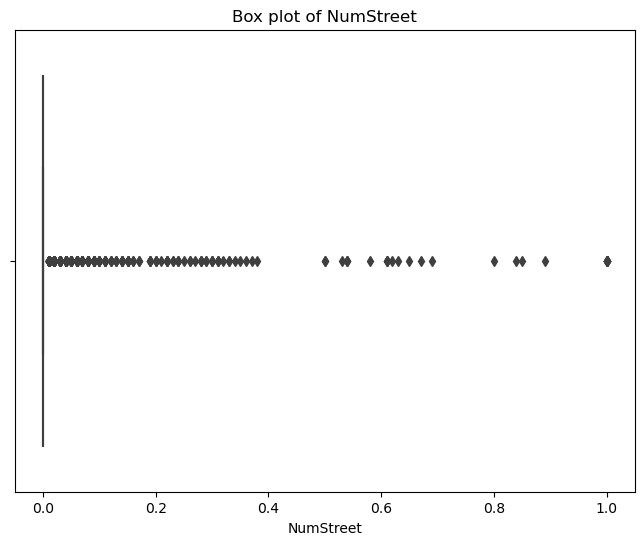

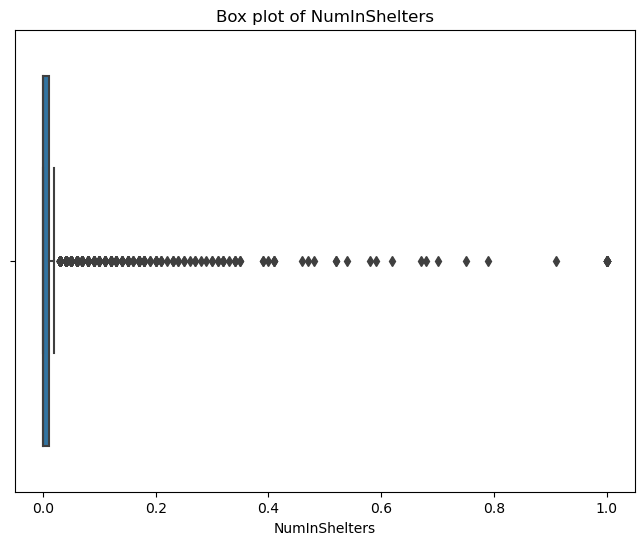

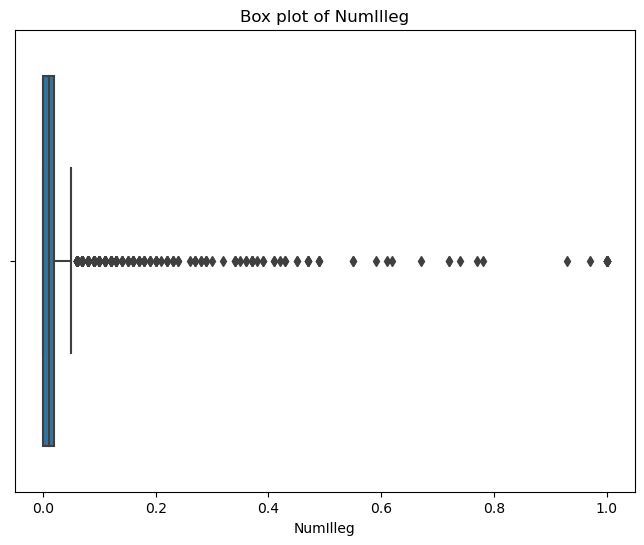

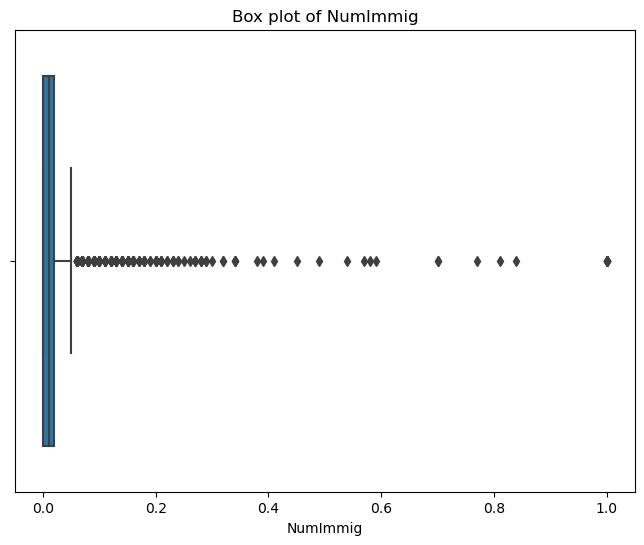

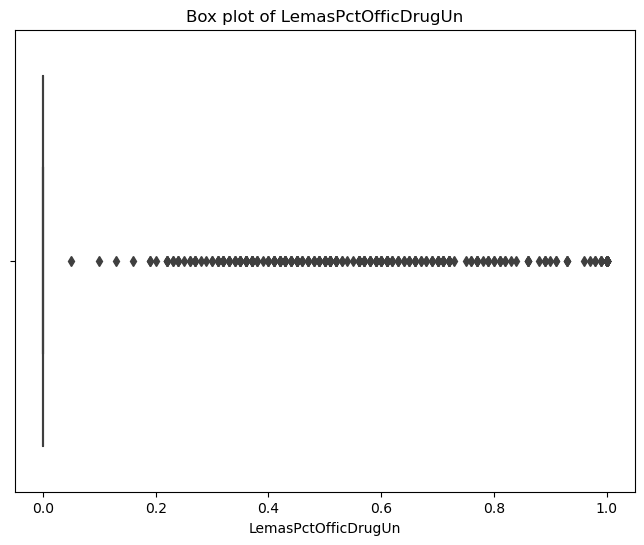

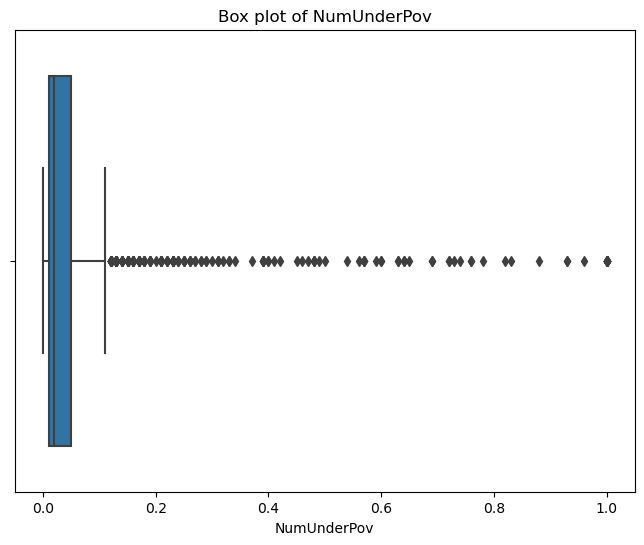

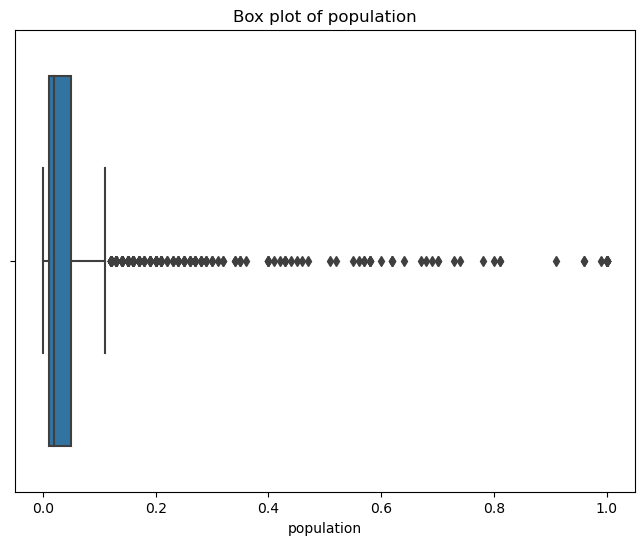

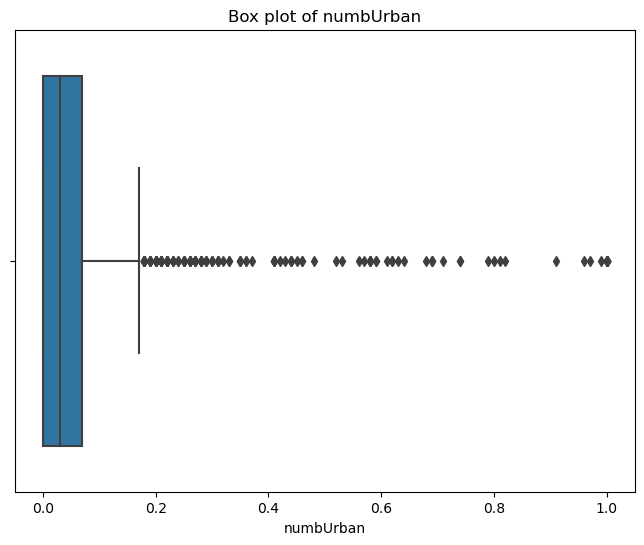

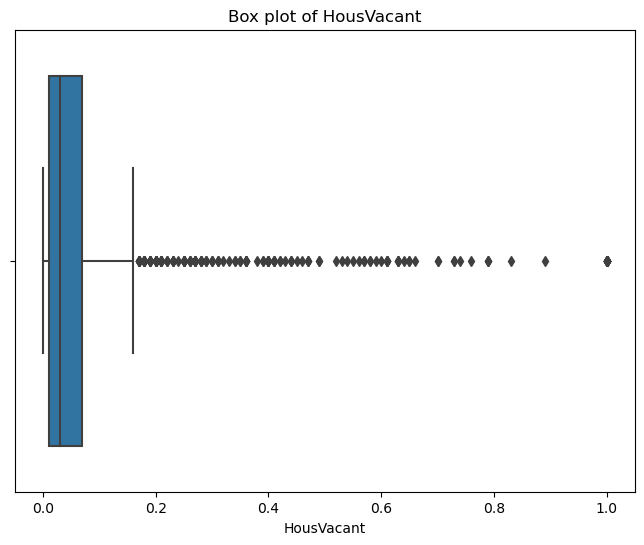

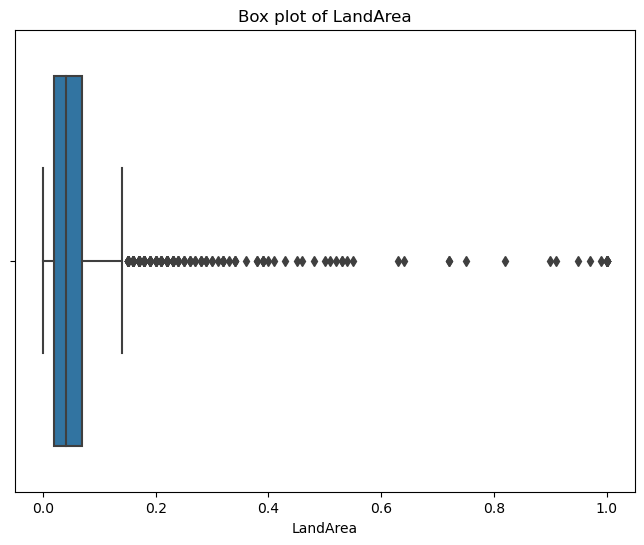

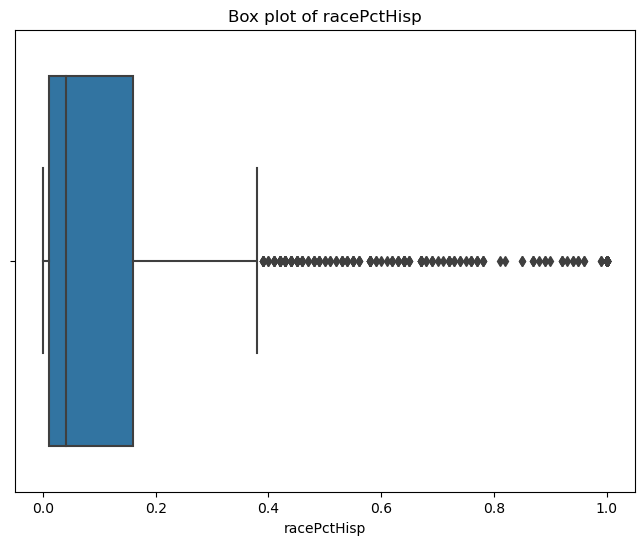

In [24]:
data_selected = imputed_data[top_features.index]
for feature in top_features.index:
    # Box plot
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=data_selected[feature])
    plt.title(f"Box plot of {feature}")
    plt.xlabel(feature)
    plt.show()

### Findings: 
* The scatterplots are completely scattered making it impossible to draw any conclusion only from it.

### (f) Fit a linear model

##### Fit a linear model using least squares to the training set and report the test error

In [25]:
train_x, train_y = imputed_train_data.iloc[:, :-1], imputed_train_data.iloc[:, -1:]
test_x, test_y = imputed_test_data.iloc[:, :-1], imputed_test_data.iloc[:, -1:]

# training the model
train_x = sm.add_constant(train_x)
model = sm.OLS(train_y, train_x).fit()
print(model.summary())

# training mse
pred_train_y = model.predict(train_x)
mse_train = round(mean_squared_error(train_y, pred_train_y), 5)

# testing mse
test_x = sm.add_constant(test_x)
pred_test_y = model.predict(test_x)
mse_test = round(mean_squared_error(test_y, pred_test_y), 5)

                             OLS Regression Results                            
Dep. Variable:     ViolentCrimesPerPop   R-squared:                       0.711
Model:                             OLS   Adj. R-squared:                  0.686
Method:                  Least Squares   F-statistic:                     27.94
Date:                 Fri, 22 Mar 2024   Prob (F-statistic):          6.56e-291
Time:                         18:41:13   Log-Likelihood:                 955.40
No. Observations:                 1495   AIC:                            -1667.
Df Residuals:                     1373   BIC:                            -1019.
Df Model:                          121                                         
Covariance Type:             nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const               

In [26]:
print(f"Training MSE: {mse_train}")
print(f"Testing MSE : {mse_test}")

Training MSE: 0.01631
Testing MSE : 0.01811


### (g) Fit a ridge regression model

##### Fit a ridge regression model on the training set, with λ chosen by cross-validation.
##### Report the test error obtained

In [27]:
# Initialize and fit the Ridge regression model with cross-validation
ridge_model = RidgeCV(alphas=[0.1, 1.0, 10.0], cv=5)
ridge_model.fit(train_x, train_y)

# Get the best alpha (λ) chosen by cross-validation
best_alpha = ridge_model.alpha_

# Make predictions on the training set
pred_train_y_ridge = ridge_model.predict(train_x)

# Compute training MSE
mse_train_ridge = mean_squared_error(train_y, pred_train_y_ridge)

# Make predictions on the test set
pred_test_y_ridge = ridge_model.predict(test_x)

# Compute test MSE
mse_test_ridge = mean_squared_error(test_y, pred_test_y_ridge)

# Print the best alpha and test MSE
print("Best alpha (λ) chosen by cross-validation:", best_alpha)
print("Test MSE obtained with Ridge regression:", mse_test_ridge)

Best alpha (λ) chosen by cross-validation: 1.0
Test MSE obtained with Ridge regression: 0.017723737122827793


### (h) Fit a LASSO model

##### Fit a LASSO model on the training set, with λ chosen by cross-validation. Report the test error obtained, along with a list of the variables selected by the model.

In [28]:
# Fit LASSO model on the training set
lasso_model = LassoCV(cv = KFold(n_splits = 5, random_state = 50, shuffle = True))
lasso_model.fit(train_x, train_y)

# Get the best alpha (λ) chosen by cross-validation
best_alpha_lasso = lasso_model.alpha_

# Make predictions on the training set
pred_train_y_lasso = lasso_model.predict(train_x)

# Compute training MSE
mse_train_lasso = mean_squared_error(train_y, pred_train_y_lasso)

# Make predictions on the test set
pred_test_y_lasso = lasso_model.predict(test_x)

# Compute test MSE
mse_test_lasso = mean_squared_error(test_y, pred_test_y_lasso)

# Get the selected features
selected_features = train_x.columns[lasso_model.coef_ != 0]

# Print the best alpha, test MSE, and selected features
print("Best alpha (λ) chosen by cross-validation:", best_alpha_lasso)
print("Test MSE obtained with LASSO regression:", mse_test_lasso)
print("Number of Selected features: ", len(selected_features))
print("Selected features by LASSO model:", selected_features)

Best alpha (λ) chosen by cross-validation: 9.421060424823112e-05
Test MSE obtained with LASSO regression: 0.01778029423811262
Number of Selected features:  78
Selected features by LASSO model: Index(['racepctblack', 'racePctAsian', 'agePct12t21', 'agePct12t29',
       'agePct65up', 'pctUrban', 'pctWWage', 'pctWFarmSelf', 'pctWInvInc',
       'pctWSocSec', 'pctWPubAsst', 'pctWRetire', 'whitePerCap', 'blackPerCap',
       'indianPerCap', 'AsianPerCap', 'OtherPerCap', 'HispPerCap',
       'PctPopUnderPov', 'PctLess9thGrade', 'PctBSorMore', 'PctEmploy',
       'PctEmplManu', 'PctOccupManu', 'MalePctDivorce', 'MalePctNevMarr',
       'FemalePctDiv', 'PctKids2Par', 'PctYoungKids2Par', 'PctTeen2Par',
       'PctWorkMom', 'NumIlleg', 'PctIlleg', 'NumImmig', 'PctImmigRec10',
       'PctRecImmig10', 'PctNotSpeakEnglWell', 'PctLargHouseOccup',
       'PersPerOccupHous', 'PctPersOwnOccup', 'PctPersDenseHous',
       'PctHousLess3BR', 'MedNumBR', 'HousVacant', 'PctHousOccup',
       'PctVacantBoard

##### Repeat with standardized features. Report the test error for both cases and compare them.

In [29]:
train_x, train_y = imputed_train_data.iloc[:, :-1], imputed_train_data.iloc[:, -1:]
test_x, test_y = imputed_test_data.iloc[:, :-1], imputed_test_data.iloc[:, -1:]

# Standardize the features
scaler = StandardScaler()
train_x_scaled = scaler.fit_transform(train_x)
test_x_scaled = scaler.transform(test_x)

train_x_scaled_df = pd.DataFrame(train_x_scaled)
    
# Fit LASSO model on the standardized training set
lasso_model_scaled = LassoCV(cv=KFold(n_splits=5, random_state=50, shuffle=True))
lasso_model_scaled.fit(train_x_scaled, train_y)

# Get the best alpha (λ) chosen by cross-validation
best_alpha_lasso_scaled = lasso_model_scaled.alpha_

# Make predictions on the training set
pred_train_y_lasso_scaled = lasso_model_scaled.predict(train_x_scaled)

# Compute training MSE
mse_train_lasso_scaled = mean_squared_error(train_y, pred_train_y_lasso_scaled)

# Make predictions on the test set
pred_test_y_lasso_scaled = lasso_model_scaled.predict(test_x_scaled)

# Compute test MSE
mse_test_lasso_scaled = mean_squared_error(test_y, pred_test_y_lasso_scaled)

# Get the selected features
selected_features_scaled = train_x.columns[lasso_model_scaled.coef_ != 0]

# Print the best alpha, test MSE, and selected features
print("Best alpha (λ) chosen by cross-validation with standardization:", best_alpha_lasso_scaled)
print("Test MSE obtained with LASSO regression and standardization:", mse_test_lasso_scaled)
print("Number of Selected features with standardization: ", len(selected_features_scaled))
print("Selected features by LASSO model with standardization:", selected_features_scaled)

Best alpha (λ) chosen by cross-validation with standardization: 0.0007116541214377484
Test MSE obtained with LASSO regression and standardization: 0.01782421487123247
Number of Selected features with standardization:  73
Selected features by LASSO model with standardization: Index(['racepctblack', 'racePctAsian', 'agePct12t21', 'agePct12t29',
       'pctUrban', 'pctWWage', 'pctWFarmSelf', 'pctWInvInc', 'pctWSocSec',
       'pctWPubAsst', 'pctWRetire', 'whitePerCap', 'blackPerCap',
       'indianPerCap', 'AsianPerCap', 'OtherPerCap', 'HispPerCap',
       'PctPopUnderPov', 'PctLess9thGrade', 'PctEmploy', 'PctEmplManu',
       'MalePctDivorce', 'MalePctNevMarr', 'FemalePctDiv', 'PctKids2Par',
       'PctYoungKids2Par', 'PctTeen2Par', 'PctWorkMom', 'NumIlleg', 'PctIlleg',
       'NumImmig', 'PctImmigRec10', 'PctRecImmig10', 'PctNotSpeakEnglWell',
       'PctLargHouseOccup', 'PersPerOccupHous', 'PctPersOwnOccup',
       'PctPersDenseHous', 'PctHousLess3BR', 'MedNumBR', 'HousVacant',
       

### Findings: 
* These isnt much of a difference between the two. It seems that non-standardized data has **slighly less test mse** compared to standardized data.

### (i) Fit a PCR model

##### Fit a PCR model on the training set, with M (the number of principal components) chosen by cross-validation. Report the test error obtained.

In [30]:
# Standardize the features
scaler = StandardScaler()
train_x_scaled = scaler.fit_transform(train_x)
test_x_scaled = scaler.transform(test_x)

# Perform PCA
pca = PCA()

# Create a PCR pipeline
pipeline = Pipeline([
    ("pca", pca),
    ("regression", LinearRegression())
])

# Perform cross-validation to select the number of principal components
cv_scores = []
components_range = range(1, train_x.shape[1] + 1)
for n_components in components_range:
    pipeline.set_params(pca__n_components=n_components)
    scores = cross_val_score(pipeline, train_x_scaled, train_y, cv=5, scoring='neg_mean_squared_error')
    cv_scores.append(-scores.mean())

# Choose the number of components with the lowest cross-validation error
best_n_components = components_range[np.argmin(cv_scores)]

# Fit the PCR model with the selected number of components
pipeline.set_params(pca__n_components=best_n_components)
pipeline.fit(train_x_scaled, train_y)

# Make predictions on the test set
pred_test_y_pcr = pipeline.predict(test_x_scaled)

# Compute test MSE
mse_test_pcr = mean_squared_error(test_y, pred_test_y_pcr)

# Report the test error obtained
print("Test MSE obtained with PCR:", mse_test_pcr)

Test MSE obtained with PCR: 0.018358274779126448


### (j) Fit a boosting tree

##### In this section, we would like to fit a boosting tree to the data. As in classification trees, one can use any type of regression at each node to build a multivariate regression tree. Because the number of variables is large in this problem, one can use L1-penalized regression at each node. Such a tree is called L1 penalized gradient boosting tree. You can use XGBoost5 to fit the model tree. Determine α (the regularization term) using cross-validation

In [200]:
!pip install xgboost

  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/24/ec/ad387100fa3cc2b9b81af0829b5ecfe75ec5bb19dd7c19d4fea06fb81802/xgboost-2.0.3-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB 330.3 kB/s eta 0:05:02
   ---------------------------------------- 0.2/99.8 MB 1.4 MB/s eta 0:01:12
   ---------------------------------------- 1.0/99.8 MB 4.6 MB/s eta 0:00:22
    --------------------------------------- 2.0/99.8 MB 7.9 MB/s eta 0:00:13
   - -------------------------------------- 3.1/99.8 MB 10.4 MB/s eta 0:00:10
   -- ------------------------------------- 5.0/99.8 MB 14.0 MB/s eta 0:00:07
   -- ------------------------------------- 6.7/9

In [31]:
# Define the parameter grid including the values of α to be tested
param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1.0]  # Adjust the values as needed
}

# Initialize XGBoost regressor
xgb_regressor = xgb.XGBRegressor(objective='reg:squarederror')

# Perform cross-validation to select the optimal α
grid_search = GridSearchCV(estimator=xgb_regressor, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(train_x, train_y)

# Get the best α
best_alpha_xgb = grid_search.best_params_['alpha']

# Fit the L1-penalized gradient boosting tree model with the selected α
xgb_regressor_best = xgb.XGBRegressor(objective='reg:squarederror', alpha=best_alpha_xgb)
xgb_regressor_best.fit(train_x, train_y)

# Make predictions on the test set
pred_test_y_xgb = xgb_regressor_best.predict(test_x)

# Compute test MSE
mse_test_xgb = mean_squared_error(test_y, pred_test_y_xgb)

# Report the test error obtained
print("Best α chosen by cross-validation:", best_alpha_xgb)
print("Test MSE obtained with L1-penalized gradient boosting tree:", mse_test_xgb)

Best α chosen by cross-validation: 1.0
Test MSE obtained with L1-penalized gradient boosting tree: 0.017833314078756258


## Conclusion

In this assignment, we built a comprehensive regression framework to predict violent crime rates across U.S. communities using the Communities and Crime dataset. Through data cleaning, imputation, dimensionality reduction (PCA), and feature selection via Coefficient of Variation, we prepared a high-dimensional dataset for robust modeling.

We trained and cross-validated multiple regression models including Ordinary Least Squares (OLS), Ridge, LASSO, Principal Component Regression (PCR), and XGBoost. Our evaluation showed that LASSO effectively selected sparse, interpretable feature sets, while XGBoost demonstrated superior generalization and predictive accuracy.

This project highlights how regularization techniques and ensemble methods can be leveraged to model complex, real-world socio-criminal data and forecast community-level crime trends with both accuracy and interpretability.
